In [1]:
install.packages("wnominate")
library(wnominate)
install.packages("pscl")
library(pscl)
install.packages("coda")
library(coda)

Aktualisiere HTML-Index der Pakete in '.Library'

Making 'packages.html' ...
 fertig

Lade nötiges Paket: pscl

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


## W-NOMINATE Ideal Point Package

## Copyright 2006 -2024

## Keith Poole, Jeffrey Lewis, James Lo, and Royce Carroll

## Support provided by the U.S. National Science Foundation

## NSF Grant SES-0611974


Aktualisiere HTML-Index der Pakete in '.Library'

Making 'packages.html' ...
 fertig

Aktualisiere HTML-Index der Pakete in '.Library'

Making 'packages.html' ...
 fertig



## Demo Run

In [6]:
folder_name <- 'Smartvote'
data_name <- 'Binary'

folder_path <- sprintf("../../data/%s", folder_name)
data_path <- sprintf("../../data/%s/%s", folder_name, data_name)

In [7]:
users <- read.csv(sprintf("%s/train_candidates.csv", folder_path), header=TRUE, row.names=1)
head(users)

,index,party,color,party_id,yays,nays
,<int>,<chr>,<chr>,<int>,<int>,<int>
0,6,Grüne,#008000,4,48,27
1,17,FDP,#4169E1,2,37,38
2,40,FDP,#4169E1,2,42,33
3,41,Grüne,#008000,4,44,31
4,44,glp,#32CD32,6,44,31
6,91,CVP,#FFA500,3,38,37


In [12]:
p <- 80
reactions <- read.csv(sprintf("%s/train_reactions_%d.csv", data_path, p), header=TRUE, row.names=1)
head(reactions)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,NA,NA,NA,1,NA,NA,NA,NA,1,NA,⋯,NA,NA,NA,NA,NA,NA,1,NA,1,NA
1,NA,NA,NA,NA,1,NA,NA,NA,NA,0,⋯,NA,NA,NA,NA,1,NA,NA,NA,NA,NA
2,1,NA,0,NA,NA,NA,0,1,NA,NA,⋯,NA,NA,NA,NA,NA,NA,0,0,NA,NA
3,NA,0,NA,NA,1,NA,1,0,NA,NA,⋯,NA,NA,1,NA,0,NA,NA,NA,NA,NA
4,NA,1,NA,NA,1,0,NA,NA,NA,1,⋯,NA,NA,NA,0,NA,NA,0,NA,0,NA
6,1,0,NA,NA,NA,NA,NA,NA,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,0,NA,0


In [13]:
rollcalls <- rollcall(reactions, legis.data=users['party'])
summary(rollcalls, verbose=TRUE)

by vote...and party loyalty scores



Number of Legislators:		 1622
Number of Roll Call Votes:	 75


Using the following codes to represent roll call votes:
Yea:		 1 
Nay:		 0 
Abstentions:	 NA 
Not In Legislature:	 9 

Party Composition:
  BDP   CVP   FDP Grüne    SP   SVP   glp 
  110   317   233   214   280   225   243 

Vote Summary:
        Count Percent
0 (nay) 10971    45.1
1 (yea) 13359    54.9

Lop-sided Votes (Number Voting in Minority), and Frequencies:
 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 
26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 
 0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  2 
52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 
 0  0  0  0  1  2  1  0  0  1  2  1  1  0  1  1  1  0  2  0  0  0  0  1  0  0 
78 79 80 81 
 2  0  3  0 

Summary By Legislator: Counts, Percentages and Party Loyalty
      

In [14]:
NOMINATE <- wnominate(rollcalls, polarity=c(1,2), dims=2, minvotes=4, lop=0)


Preparing to run W-NOMINATE...

	Checking data...

		All members meet minimum vote requirements.

		All votes meet minimum lopsidedness requirement.

	Running W-NOMINATE...

		Getting bill parameters...
		Getting legislator coordinates...
		Starting estimation of Beta...
		Getting bill parameters...
		Getting legislator coordinates...
		Starting estimation of Beta...
		Getting bill parameters...
		Getting legislator coordinates...
		Getting bill parameters...
		Getting legislator coordinates...
		Estimating weights...
		Getting bill parameters...
		Getting legislator coordinates...
		Estimating weights...
		Getting bill parameters...
		Getting legislator coordinates...


W-NOMINATE estimation completed successfully.
W-NOMINATE took 16.688 seconds to execute.



In [15]:
summary(NOMINATE)



SUMMARY OF W-NOMINATE OBJECT
----------------------------

Number of Legislators:	  1622 (0 legislators deleted)
Number of Votes:	  75 (0 votes deleted)
Number of Dimensions:	  2
Predicted Yeas:		  11852 of 13359 (88.7%) predictions correct
Predicted Nays:		  9013 of 10971 (82.2%) predictions correct
Correct Classifiction:	  81.82% 85.76%
APRE:			  0.425 0.55
GMP:			  0.678 0.722 


The first 10 legislator estimates are:


,coord1D,coord2D
,<dbl>,<dbl>
Legislator 1,0.174,0.825
Legislator 2,-0.011,0.682
Legislator 3,0.003,0.835
Legislator 4,0.562,0.233
Legislator 5,0.080,0.145
Legislator 6,0.031,0.264
Legislator 7,0.007,-0.742
Legislator 8,0.057,-0.357
Legislator 9,0.120,-0.303


NULL

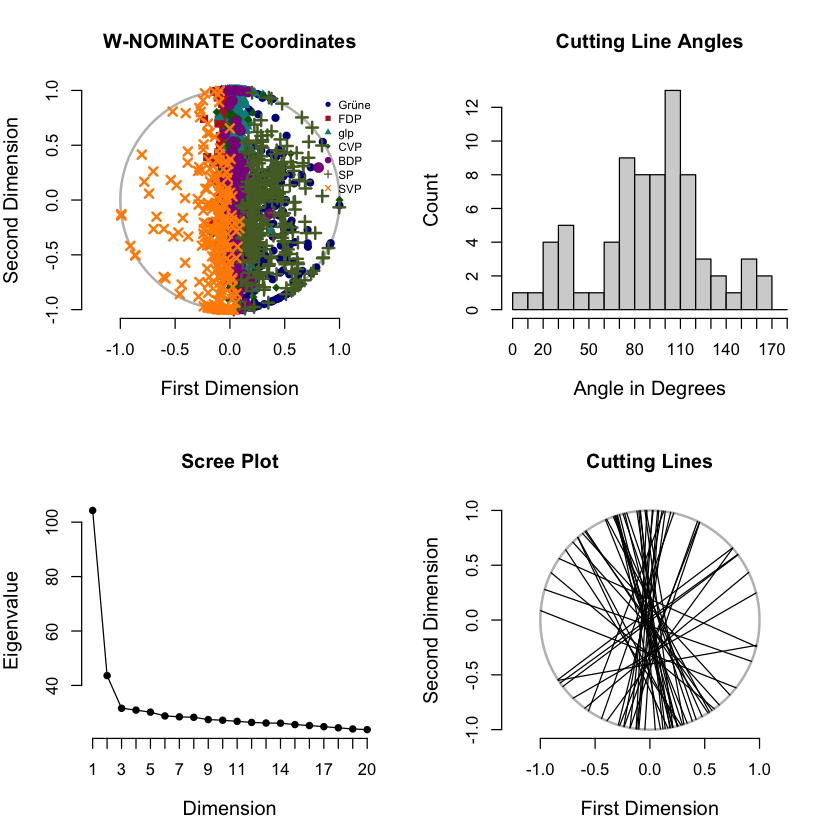

In [16]:
plot(NOMINATE)

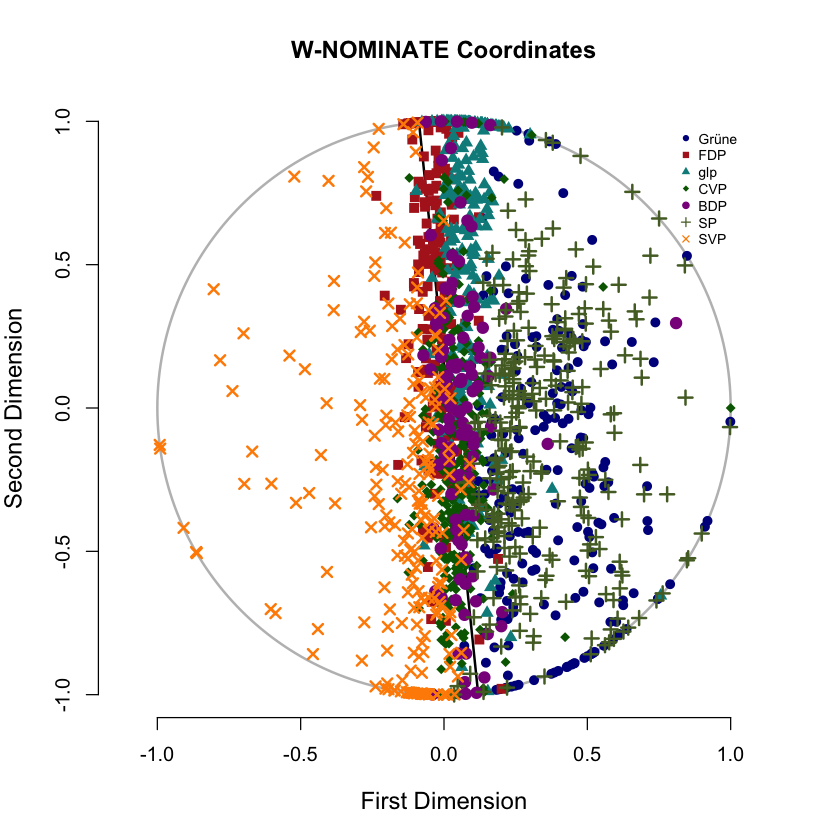

In [17]:
plot.coords(NOMINATE,cutline=4)

In [18]:
print(NOMINATE$beta)
print(NOMINATE$weights)

[1] 7.530458
attr(,"Csingle")
[1] TRUE
[1] 2.2509239 0.5521738
attr(,"Csingle")
[1] TRUE


In [105]:
NOMINATE$rollcalls$beta <- NOMINATE$beta
NOMINATE$rollcalls$weight1D <- NOMINATE$weights[1]
NOMINATE$rollcalls$weight2D <- NOMINATE$weights[2]

## Fitting the models

In [19]:
runNOMINATE <- function(folder_name, stop=95) {

    folder_path <- sprintf("../../data/%s", folder_name)
    data_path <- sprintf("../../data/%s/%s", folder_name, 'Binary')
    output_path <- sprintf("../../embeddings/NOMINATE/%s/", folder_name)

    file_list <- list.files(pattern = "^train_reactions_\\d+\\.csv$", path = data_path)

    if (!file.exists(output_path)) {
    dir.create(output_path, recursive=TRUE)
    }

    # Load Candidates
    users <- read.csv(sprintf("%s/train_candidates.csv", folder_path), header=TRUE, row.names=1)

    # Iterate through the files
    for (file_name in file_list) {

    p <- as.numeric(sub("train_reactions_(\\d+)\\.csv", "\\1", basename(file_name)))

    if (p < stop) {
        print(paste("Reading file:", p))
        reactions <- read.csv(sprintf("%s/train_reactions_%d.csv", data_path, p), header=TRUE, row.names=1)
        rollcalls <- rollcall(reactions, legis.data=users['party'])
        NOMINATE <- wnominate(rollcalls, polarity=c(1,2), dims=2, minvotes=4, lop=0.025)
        NOMINATE$rollcalls$beta <- NOMINATE$beta
        NOMINATE$rollcalls$weight1D <- NOMINATE$weights[1]
        NOMINATE$rollcalls$weight2D <- NOMINATE$weights[2]
        write.csv(NOMINATE$legislators, sprintf("%s/legislators_%d.csv", output_path, p), row.names=TRUE)
        write.csv(NOMINATE$rollcalls, sprintf("%s/rollcalls_%d.csv", output_path, p), row.names=TRUE)
    } else {
        print(paste("Skipped file:", basename(file_name)))
    }
    }
}

In [20]:
runNOMINATE('Synthetic_60_50', 75)

[1] "Reading file: 0"

Preparing to run W-NOMINATE...

	Checking data...

		All members meet minimum vote requirements.

		All votes meet minimum lopsidedness requirement.

	Running W-NOMINATE...

		Getting bill parameters...
		Getting legislator coordinates...
		Starting estimation of Beta...
		Getting bill parameters...
		Getting legislator coordinates...
		Starting estimation of Beta...
		Getting bill parameters...
		Getting legislator coordinates...
		Getting bill parameters...
		Getting legislator coordinates...
		Estimating weights...
		Getting bill parameters...
		Getting legislator coordinates...
		Estimating weights...
		Getting bill parameters...
		Getting legislator coordinates...


W-NOMINATE estimation completed successfully.
W-NOMINATE took 2.467 seconds to execute.

[1] "Reading file: 10"

Preparing to run W-NOMINATE...

	Checking data...

		All members meet minimum vote requirements.

		All votes meet minimum lopsidedness requirement.

	Running W-NOMINATE...

		Getting 

### Smartvote

In [108]:
runNOMINATE('Smartvote', 85)

[1] "Reading file: 0"

Preparing to run W-NOMINATE...

	Checking data...

		All members meet minimum vote requirements.

		All votes meet minimum lopsidedness requirement.

	Running W-NOMINATE...

		Getting bill parameters...
		Getting legislator coordinates...
		Starting estimation of Beta...
		Getting bill parameters...
		Getting legislator coordinates...
		Starting estimation of Beta...
		Getting bill parameters...
		Getting legislator coordinates...
		Getting bill parameters...
		Getting legislator coordinates...
		Estimating weights...
		Getting bill parameters...
		Getting legislator coordinates...
		Estimating weights...
		Getting bill parameters...
		Getting legislator coordinates...


W-NOMINATE estimation completed successfully.
W-NOMINATE took 21.807 seconds to execute.

[1] "Reading file: 10"

Preparing to run W-NOMINATE...

	Checking data...

		All members meet minimum vote requirements.

		All votes meet minimum lopsidedness requirement.

	Running W-NOMINATE...

		Getting

## Copy Binaries to Orginals